# Aisah - A12.2020.06389

1. Sentimen Analisis (mencari review positif/netral/negatif), 
   - Jelaskan Metode yang dipakai (TF-IDF/ Word Embedding), Processing, measurement yang dipakai (Alasan memakai metode tsb).
   - Menjelaskan coding dan hasilnya. Hasil yang disampaikan yang paling bagus yang mana.

# Menambahkan Panda

In [1]:
import pandas as pd

# Mengimport Dataset

In [2]:
df_review = pd.read_csv('PB_ROBOT.csv')

In [3]:
df_review.head()

,username,bintang,review
0,salonayu10,5,Alhamdulillah paketnya sudah sampai dgn aman\n...
1,rubbyaqilla13,5,"Alhamdulillah, pesanan saya sudah sampai nih k..."
2,n*****1,2,"pertama kali aku kasih bintang di bwh 4, tpi e..."
3,erikatjhang,5,"Pengiriman sangat cepat, padahal belinya pas l..."
4,nandagiantari2002,5,"Jika ingin menghubungi layanan PLN 123, kamu d..."


In [4]:
df_review["bintang"].value_counts()

5    2731
4     215
3      36
1      12
2       9
Name: bintang, dtype: int64

In [5]:
label = []
for index, row in df_review.iterrows():
    if row["bintang"] == 5:
        label.append(1) 
    elif row["bintang"] == 4:
        label.append(1) 
    else:
        label.append(0) 
        
df_review["label"] = label
df_review = df_review.drop(columns=['bintang'])
df_review.head() 

,username,review,label
0,salonayu10,Alhamdulillah paketnya sudah sampai dgn aman\n...,1
1,rubbyaqilla13,"Alhamdulillah, pesanan saya sudah sampai nih k...",1
2,n*****1,"pertama kali aku kasih bintang di bwh 4, tpi e...",0
3,erikatjhang,"Pengiriman sangat cepat, padahal belinya pas l...",1
4,nandagiantari2002,"Jika ingin menghubungi layanan PLN 123, kamu d...",1


In [6]:
df_review['label'].value_counts()

1    2946
0      57
Name: label, dtype: int64

In [7]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop(columns=['username'])
df_preprocessed.head()

,review,label
0,Alhamdulillah paketnya sudah sampai dgn aman\n...,1
1,"Alhamdulillah, pesanan saya sudah sampai nih k...",1
2,"pertama kali aku kasih bintang di bwh 4, tpi e...",0
3,"Pengiriman sangat cepat, padahal belinya pas l...",1
4,"Jika ingin menghubungi layanan PLN 123, kamu d...",1


In [8]:
null_counts = df_review.isnull().sum()
print(null_counts)

username     6
review      76
label        0
dtype: int64


In [9]:
df_review['review'].fillna('tidak ada review', inplace=True)

In [10]:
null_counts = df_review.isnull().sum()
print(null_counts)

username    6
review      0
label       0
dtype: int64


In [11]:
df_review['review'].astype(str)

0       Alhamdulillah paketnya sudah sampai dgn aman\n...
1       Alhamdulillah, pesanan saya sudah sampai nih k...
2       pertama kali aku kasih bintang di bwh 4, tpi e...
3       Pengiriman sangat cepat, padahal belinya pas l...
4       Jika ingin menghubungi layanan PLN 123, kamu d...
                              ...                        
2998                         Pengiriman cepat semoga awet
2999     produk oke banget, slim, warna nya hijau mate 👌👌
3000                                     tidak ada review
3001    Powerbank nya bagus, gak tebel2 banget, jadi g...
3002    Apakah kalian paham pengertian  Bioteknologi? ...
Name: review, Length: 3003, dtype: object

In [12]:
df_review['username'].astype(str)

0              salonayu10
1           rubbyaqilla13
2                 n*****1
3             erikatjhang
4       nandagiantari2002
              ...        
2998       hamilham041201
2999       riyadarmansyah
3000        prishelapailo
3001    _indahsetyowati22
3002           tukma_sari
Name: username, Length: 3003, dtype: object

In [13]:
s_1 = df_preprocessed[df_preprocessed['label']==0].sample(50,replace=True)
s_2 = df_preprocessed[df_preprocessed['label']==1].sample(50,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['label'].value_counts(normalize=True))

(100, 2)
0    0.5
1    0.5
Name: label, dtype: float64


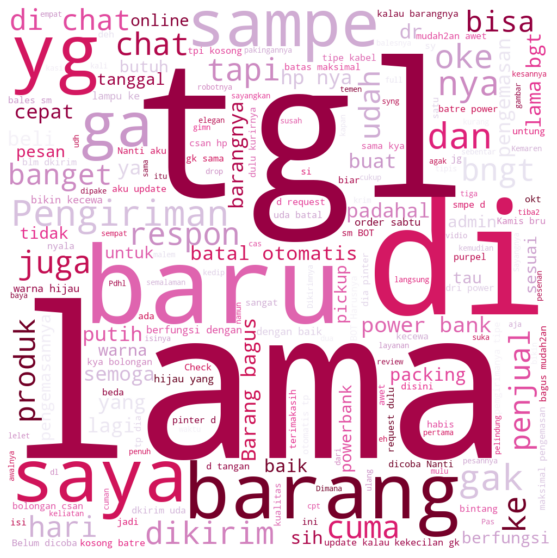

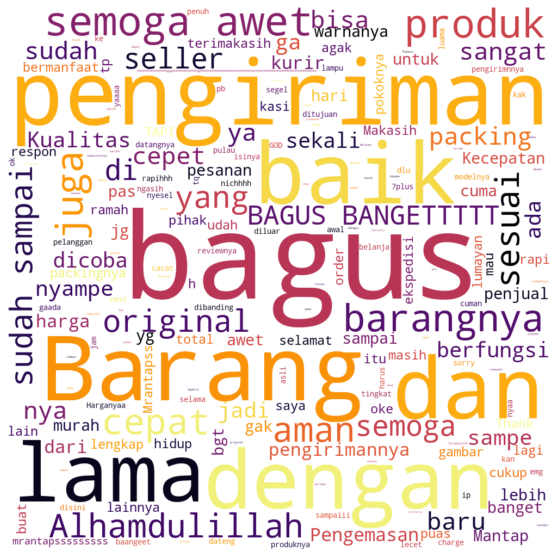

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["label"] == 0]
all_text_s0 = ' '.join(map(str, train_s0["review"]))
wordcloud = WordCloud(colormap='PuRd_r', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["label"] == 1]
all_text_s1 = ' '.join(map(str, train_s1["review"]))
wordcloud = WordCloud(colormap='inferno', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [15]:
wf=wordcloud.words_

In [16]:
import string, re

def cleansing(data):
    
    # lower text
    data = str(data).lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [17]:
# jalankan cleansing data
review = []
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["review"]))

df_preprocessed["review"] = review
df_preprocessed.tail()

,review,label
194,warnanya cakeppp bangett gaboong pengirimanny...,1
1174,barang bagus sebenarnya mau hijau tapi sto...,1
2237,terimakasih barang sudah sampai produk origin...,1
2479,alhamdulillah barang nya sudah sampai dengan s...,1
2374,produk bagus diterima dengan baik semoga berm...,1


In [18]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [19]:
# import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Contoh
kalimat = 'Dengan Menggunakan Python dan Library Sastrawi saya dapat melakukan proses Stopword Removal'
stop = stopword.remove(kalimat)
print(stop)

Dengan Menggunakan Python Library Sastrawi dapat melakukan proses Stopword Removal


In [20]:
# lakukan pada data kita

review = []
for index, row in df_preprocessed.iterrows():
    review.append(stopword.remove(row["review"]))
    
df_preprocessed["review"] = review
df_preprocessed.tail()

,review,label
194,warnanya cakeppp bangett gaboong pengirimanny...,1
1174,barang bagus sebenarnya mau hijau stok kos...,1
2237,terimakasih barang sampai produk original se...,1
2479,alhamdulillah barang nya selamat berfungsi se...,1
2374,produk bagus diterima baik semoga bermanfaat,1


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'Liverpool adalah klub hebat tidak seperti si itu wkwk'
katadasar = stemmer.stem(kalimat)

print(katadasar)

liverpool adalah klub hebat tidak seperti si itu wkwk


In [37]:
# implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
    review.append(stemmer.stem(row["review"]))

df_preprocessed["review"] = review
df_preprocessed.tail()

,review,label
194,warna cakeppp bangett gaboong kirim jg cepat,1
1174,barang bagus benar mau hijau stok kosong cepat...,1
2237,terimakasih barang sampai produk original moga...,1
2479,alhamdulillah barang nya selamat fungsi moga a...,1
2374,produk bagus terima baik moga manfaat,1


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['label'],
                                                    test_size=0.5, stratify=df_preprocessed['label'], random_state=30)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
x = vectorizer.fit_transform(corpus)
x.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [40]:
# implementasi pada dokumen kita
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(50, 327)
(50, 327)


In [41]:
def preprocess_data(data):
    # cleansing data
    data = cleansing(data)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

In [42]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="linear")

#cross_val_score(clf, x_train, y_train, cv=10)

In [43]:
#lakukan prediksi pada data test
clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [44]:
# import library evalution
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [45]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, predict))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, predict))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, predict))

f1 score hasil prediksi adalah: 
0.6296296296296295
accuracy score hasil prediksi adalah: 
0.6
precision score hasil prediksi adalah: 
0.5862068965517241
recall score hasil prediksi adalah: 
0.68


In [46]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

(13, 12, 8, 17)

In [47]:
review_positif = "barang bagus, pelayanan unggul, pokoknya keren banget"
review_negatif = "penjual lama kirim, sampah"

In [48]:
clf.predict(preprocess_data(review_positif))

array([1], dtype=int64)

In [49]:
clf.predict(preprocess_data(review_negatif))

array([0], dtype=int64)